In [11]:
!pip install yellowbrick 

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ---- --------------------------------- 30.7/282.6 kB 54.6 kB/s eta 0:00:05
     ---- --------------------------------- 30.7/282.6 kB 54.6 kB/s eta 0:00:05
     ---- --------------------------------- 30.7/282.6 kB 54.6 kB/s eta 0:00:05
     ---- -------

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


In [12]:
from yellowbrick.cluster import KElbowVisualizer

In [15]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
data = data.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Genre' : 'Gender',
                              'Spending Score (1-100)': 'Score'})

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


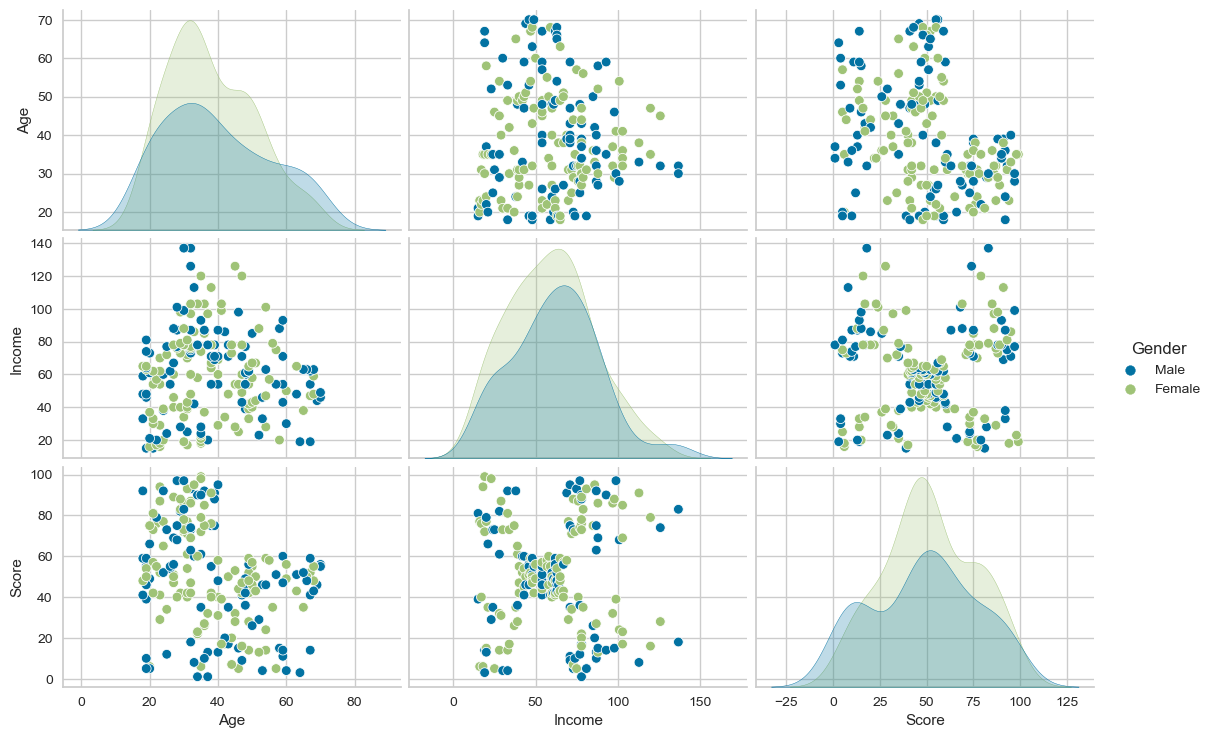

In [18]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [19]:
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'Male'else 1)
data.head()


,CustomerID,Gender,Age,Income,Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [24]:
X = data.drop(['CustomerID'], axis=1)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

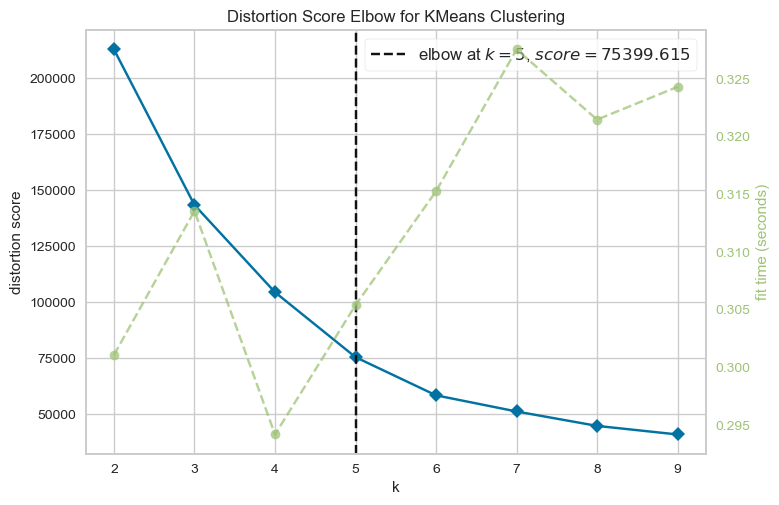

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

### K = 5

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


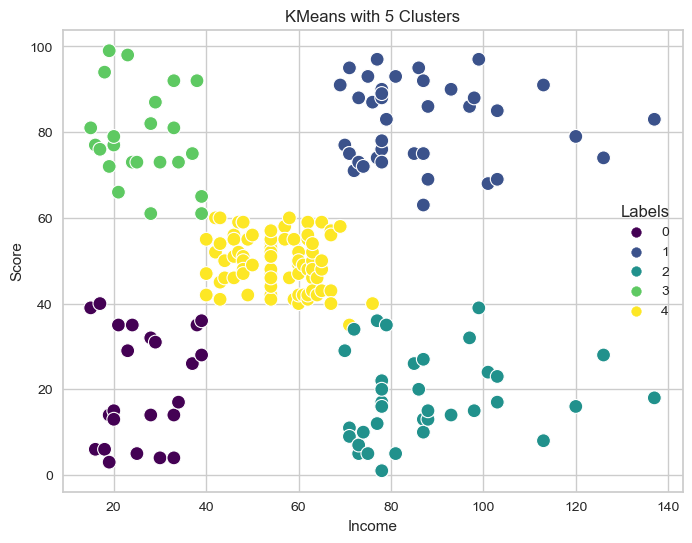

In [26]:
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Score', data=X, hue='Labels', palette='viridis', s=100)
plt.title('KMeans with 5 Clusters')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.7% of the points c

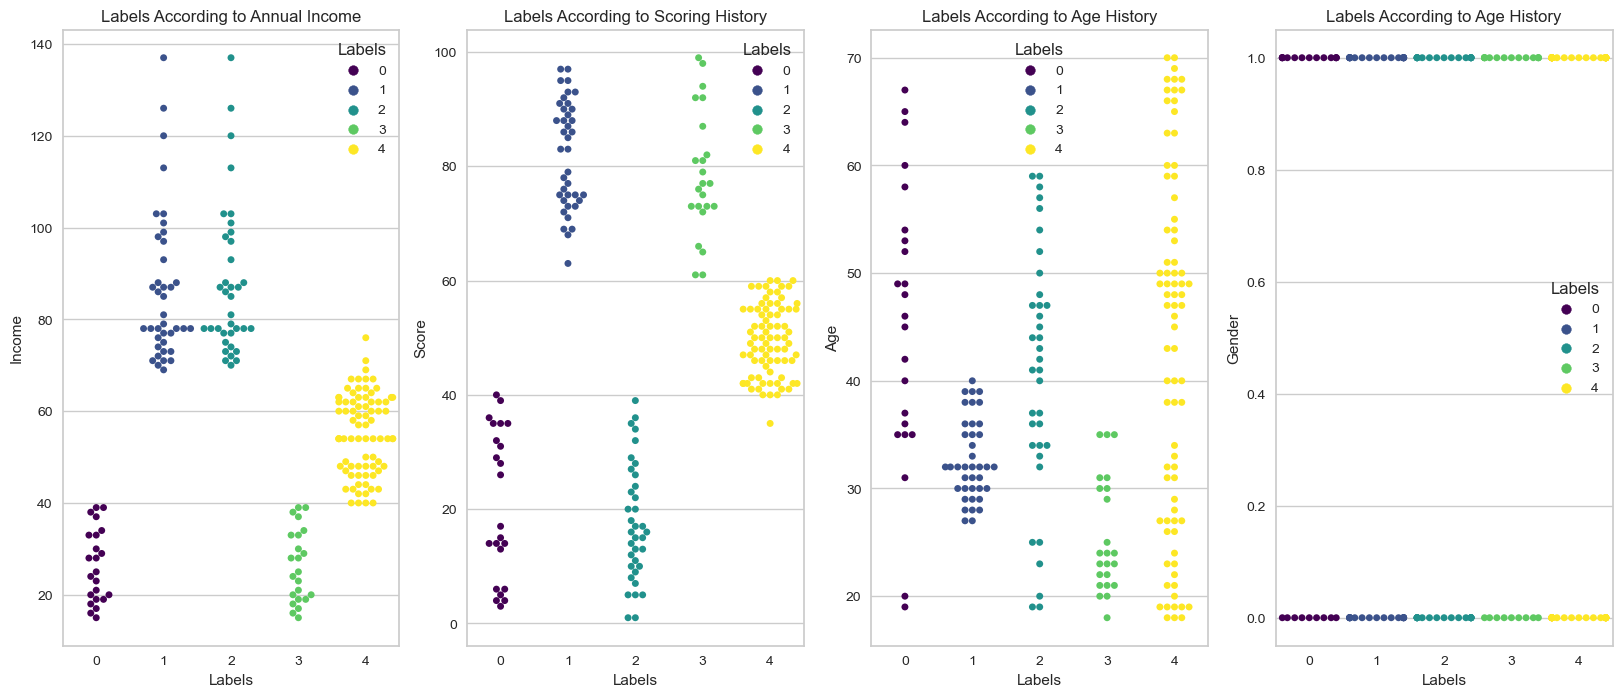

In [27]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(141)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax, hue='Labels', palette='viridis')
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(142)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax, hue='Labels', palette='viridis')
ax.set_title('Labels According to Scoring History')

ax = fig.add_subplot(143)
sns.swarmplot(x='Labels', y='Age', data=X, ax=ax, hue='Labels', palette='viridis')
ax.set_title('Labels According to Age History')

ax = fig.add_subplot(144)
sns.swarmplot(x='Labels', y='Gender', data=X, ax=ax, hue='Labels', palette='viridis')
ax.set_title('Labels According to Age History')

plt.show()


Label 0 Purple is mid income and mid spending<br>
Label 1 Blue is high income and low spending<br>
Label 2 Blushgreen is high income and high spending<br>
Label 3 Green is low income and low spending<br>
Label 4 Yellow is low income and high spending<br>

## Agglomerative Clustering

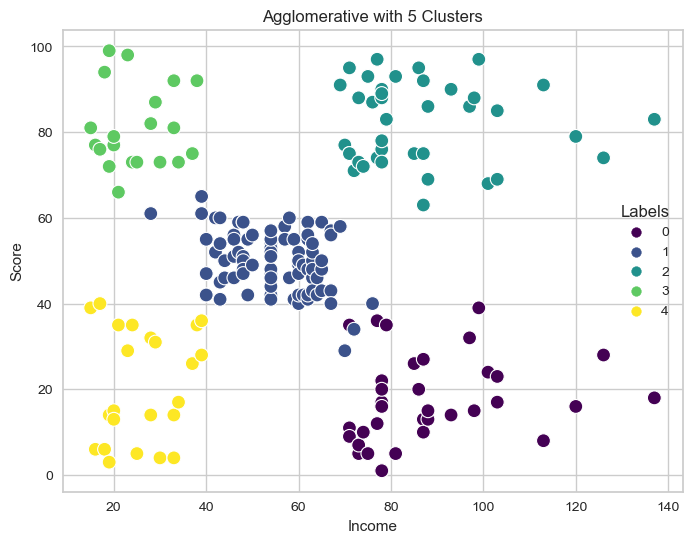

In [28]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Score', data=X, hue='Labels', palette='viridis', s=100)
plt.title('Agglomerative with 5 Clusters')
plt.show()

distance matrix contains the distance from each point to every other point of a dataset

In [29]:
dist = distance_matrix(X, X)
dist

array([[  0.        ,  42.05948169,  33.04542328, ..., 117.12813496,
        124.53915047, 130.17296186],
       [ 42.05948169,   0.        ,  75.02666193, ..., 111.76761606,
        137.77880824, 122.35195135],
       [ 33.04542328,  75.02666193,   0.        , ..., 129.89611234,
        122.2538343 , 143.78803845],
       ...,
       [117.12813496, 111.76761606, 129.89611234, ...,   0.        ,
         57.10516614,  14.35270009],
       [124.53915047, 137.77880824, 122.2538343 , ...,  57.10516614,
          0.        ,  65.06150936],
       [130.17296186, 122.35195135, 143.78803845, ...,  14.35270009,
         65.06150936,   0.        ]])

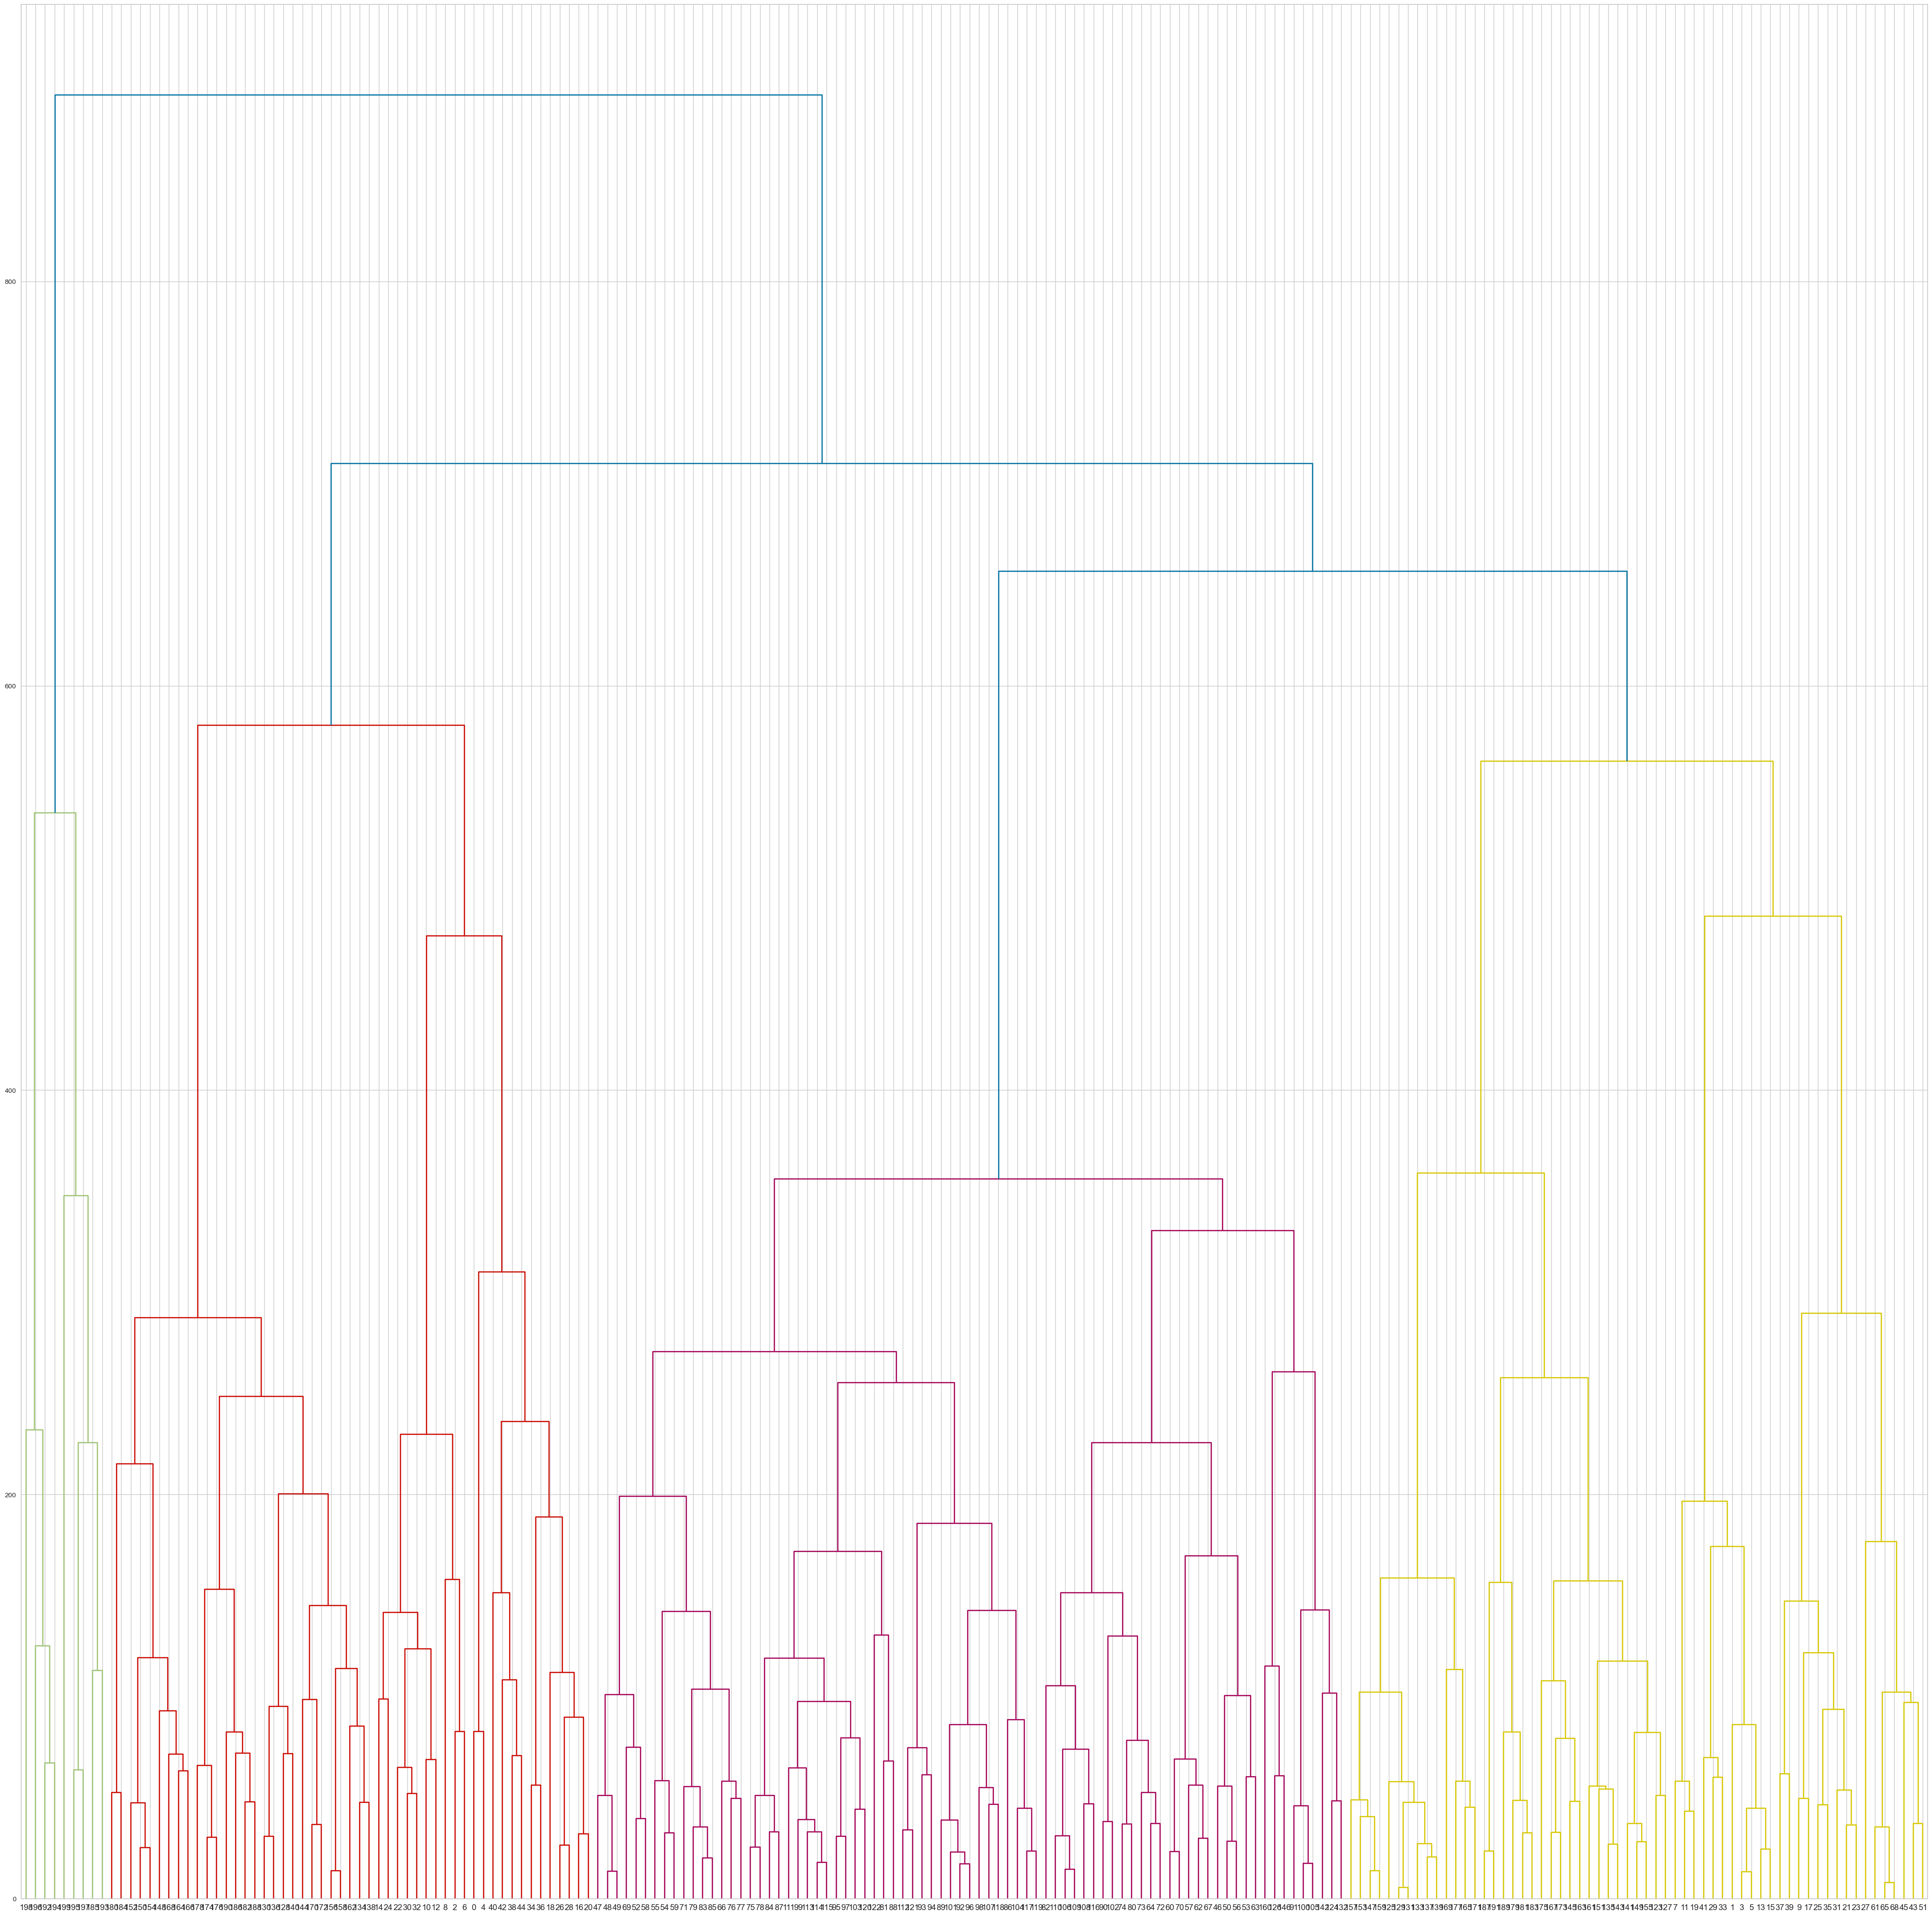

In [37]:
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(50, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='top')

C:\Users\ayhassan\AppData\Local\Temp\ipykernel_6848\1544261838.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


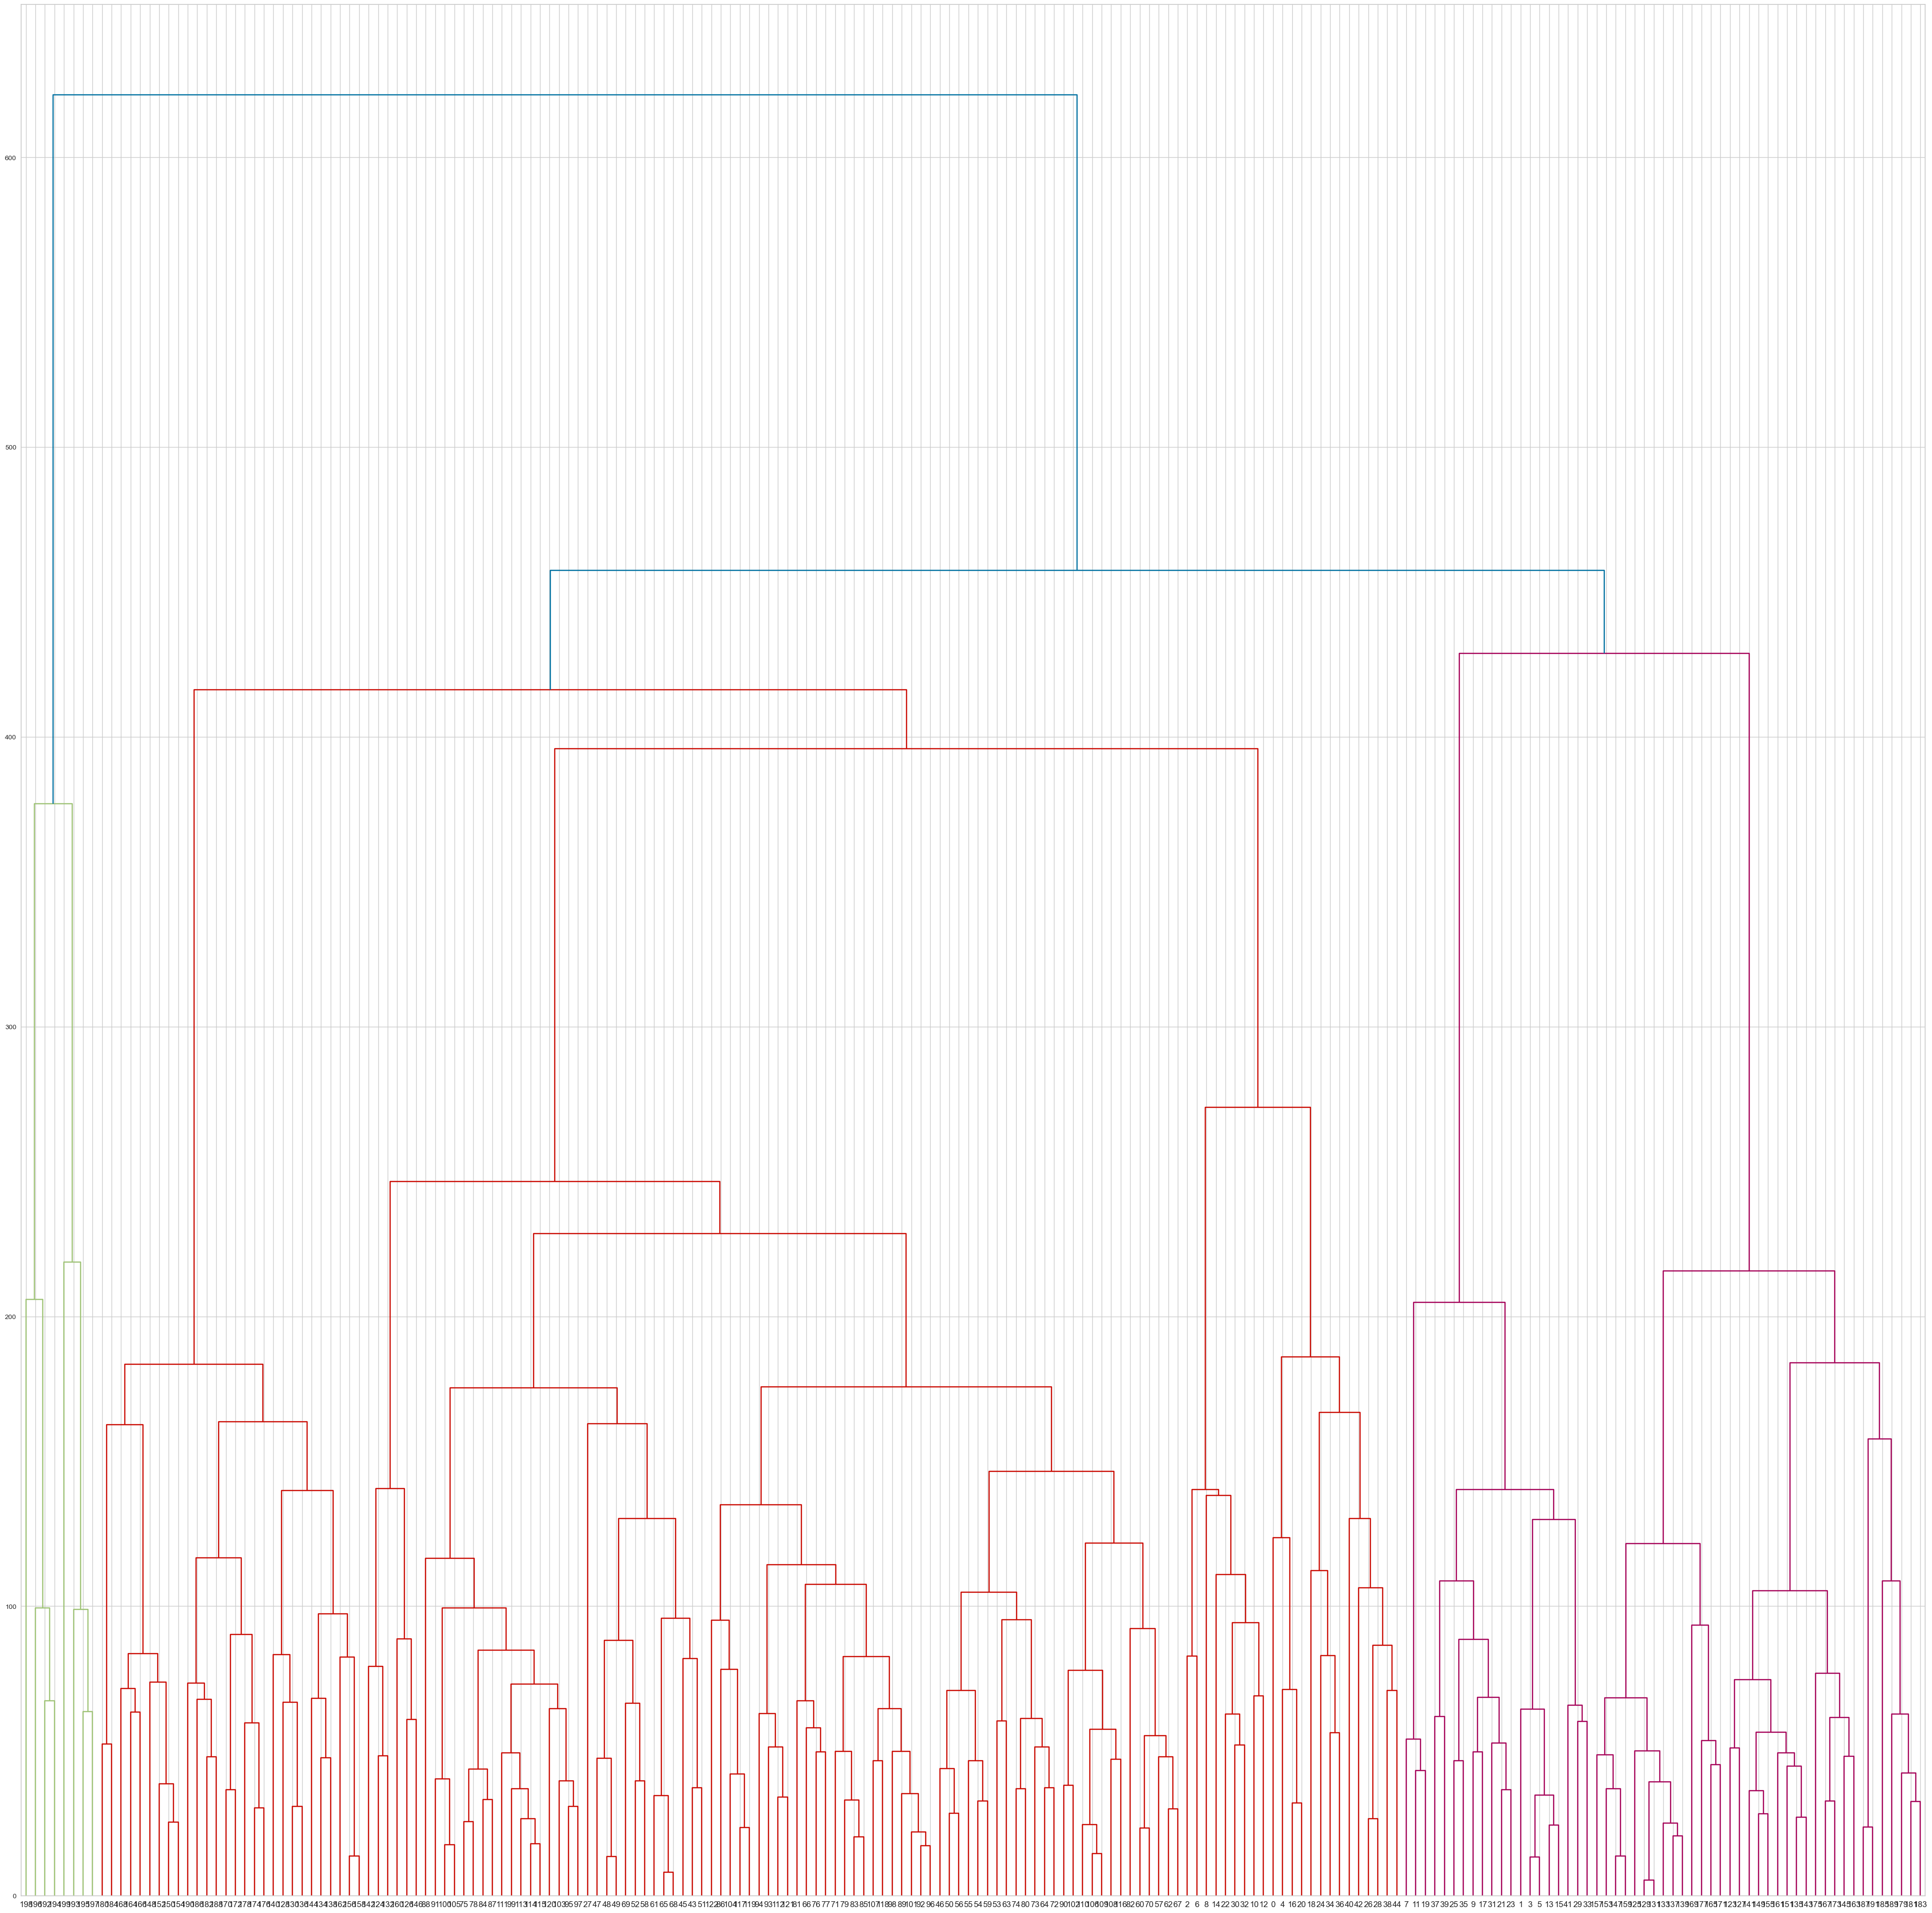

In [38]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(50, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'top')